In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

        C:\Users\mrunm\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
# https://archive.ics.uci.edu/ml/datasets.php for more datasets

In [4]:
msgs = [line.rstrip() for line in open('SMSSpamCollection')]

In [7]:
msgs[122]

'ham\there is my new address -apples&pairs&all that malarky'

In [9]:
for m_no, msg in enumerate(msgs[:10]):
    print(m_no, msg)
    print("........................")

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
........................
1 ham	Ok lar... Joking wif u oni...
........................
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
........................
3 ham	U dun say so early hor... U c already then say...
........................
4 ham	Nah I don't think he goes to usf, he lives around here though
........................
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
........................
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
........................
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy y

In [10]:
import pandas as pd

In [11]:
# separate the data based on the label by splitting at tab
df = pd.read_csv('SMSSpamCollection', sep ='\t', names =['label','message'])

In [12]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [15]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [16]:
df['length'] = df['message'].apply(len)

In [17]:
df

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

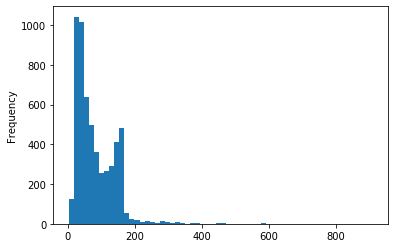

In [23]:
df['length'].plot.hist(bins = 60)

In [24]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [28]:
df[df['length'] == 910].iloc[0]

label                                                    ham
message    For me the love should start with attraction.i...
length                                                   910
Name: 1085, dtype: object

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001ECEBCB28C8>,
      dtype=object)

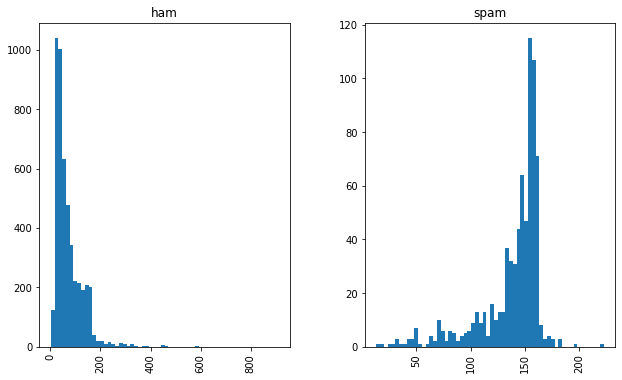

In [30]:
# By length we can distinguish the spam and ham messages.
df.hist(column = 'length', by='label', bins = 60, figsize=(10,6))

In [31]:
import string

In [32]:
mess ='Sample message! Notice: it has punctuations'

In [34]:
nopunc =[c for c in mess if c not in string.punctuation]

In [35]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n',
 's']

In [36]:
from nltk.corpus import stopwords

In [37]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
nopunc = ''.join(nopunc)

In [39]:
nopunc

'Sample message Notice it has punctuations'

In [40]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuations']

In [42]:
clean_mess = [w for w in nopunc.split() if w.lower() not in stopwords.words('english')]

In [43]:
clean_mess

['Sample', 'message', 'Notice', 'punctuations']

In [46]:
# Tokenization is cleaned words that we want removing punctuations and stopwords
def text_process(msg):
    rm_punc = [ch for ch in msg if ch not in string.punctuation]
    rm_punc =''.join(rm_punc)
    return [w for w in rm_punc.split() if w.lower() not in stopwords.words('english')]

In [48]:
df['message'].apply(text_process)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, £750, Pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: message, Length: 5572, dtype: object

In [49]:
# Stemming eg running, ran, run -> converted to run

In [50]:
# Bag of words check out orginal notebook for additional info
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['message'])

In [52]:
print(len(bow_transformer.vocabulary_))

11425


In [53]:
df['message'][3]

'U dun say so early hor... U c already then say...'

In [56]:
bow = bow_transformer.transform([df['message'][3]])

In [58]:
print(bow)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [62]:
print(bow.shape)

(1, 11425)


In [63]:
bow_transformer.get_feature_names()[4068]

'U'

In [64]:
message_bow = bow_transformer.transform(df['message'])

In [65]:
message_bow.nnz

50548

In [68]:
sparcity = (100.0* message_bow.nnz / (message_bow.shape[0] * message_bow.shape[1]))

In [69]:
sparcity

0.07940295412668218

In [70]:
from sklearn.feature_extraction.text import TfidfTransformer

In [71]:
tfidf_transformer = TfidfTransformer().fit(message_bow)

In [72]:
tfidf4 = tfidf_transformer.transform(bow)

In [73]:
tfidf4

<1x11425 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [74]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [75]:
mess_tfidf = tfidf_transformer.transform(message_bow)

In [76]:
from sklearn.naive_bayes import MultinomialNB

In [77]:
spam_detect_model = MultinomialNB().fit(mess_tfidf, df['label'])

In [79]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [82]:
df['label'][896]

'ham'

In [83]:
all_pred = spam_detect_model.predict(mess_tfidf)

In [84]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(df['message'],df['label'], test_size=0.3)

In [86]:
from sklearn.pipeline import Pipeline

In [88]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer=text_process)),
                    ('tfidf', TfidfTransformer()),
                    ('classifier', MultinomialNB())])

In [89]:
pipeline.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001ECEC653A68>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [92]:
pred = pipeline.predict(x_test)

In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1448
        spam       1.00      0.68      0.81       224

    accuracy                           0.96      1672
   macro avg       0.98      0.84      0.89      1672
weighted avg       0.96      0.96      0.95      1672



In [94]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([('bow', CountVectorizer(analyzer=text_process)),
                    ('tfidf', TfidfTransformer()),
                    ('classifier', RandomForestClassifier())])

In [95]:
pipeline.fit(x_train, y_train)
pred = pipeline.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       0.99      0.73      0.84       224

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.96      0.96      0.96      1672

